In [1]:
%run importFunctions.ipynb

# Load the Sierraleone dataset
sierraleone_df = load_data('C:/Users/KIIT/Desktop/Wind-Solar-Analysis/data/sierraleone-bumbuna.csv')

""" Summary Statistics """
print('Summary Statistics for Sierraleone:')
print(summary_statistics(sierraleone_df))

Summary Statistics for Sierraleone:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      2

In [2]:
""" Data Quality Check """
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
data_quality_check(sierraleone_df, columns_to_check)


There are no missing values.

Incorrect Entries in GHI:
 0        -0.7
1        -0.7
2        -0.7
3        -0.7
4        -0.7
         ... 
525595   -1.6
525596   -1.7
525597   -1.7
525598   -1.7
525599   -1.7
Name: GHI, Length: 261135, dtype: float64

Incorrect Entries in DNI:
 0        -0.1
1        -0.1
2        -0.1
4        -0.1
5        -0.1
         ... 
525595   -0.1
525596   -0.1
525597   -0.1
525598   -0.2
525599   -0.1
Name: DNI, Length: 266352, dtype: float64

Incorrect Entries in DHI:
 0        -0.8
1        -0.8
2        -0.8
3        -0.8
4        -0.8
         ... 
525595   -2.9
525596   -3.0
525597   -3.1
525598   -3.3
525599   -3.4
Name: DHI, Length: 263128, dtype: float64
No incorrect entries in ModA.
No incorrect entries in ModB.
No incorrect entries in WS.
No incorrect entries in WSgust.

Outliers in GHI:
 658        932.0
659        995.0
660        988.0
661        978.0
662       1071.0
           ...  
524842     931.0
524843     955.0
524845     986.0
524862

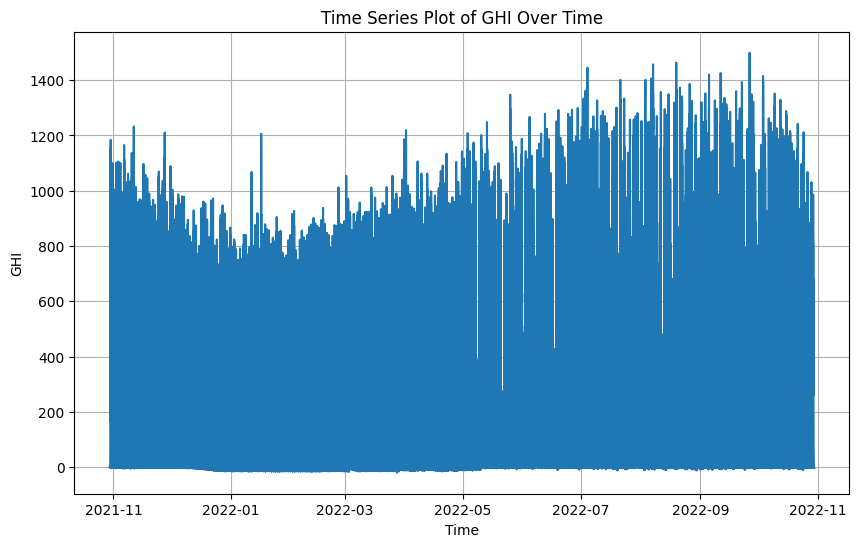

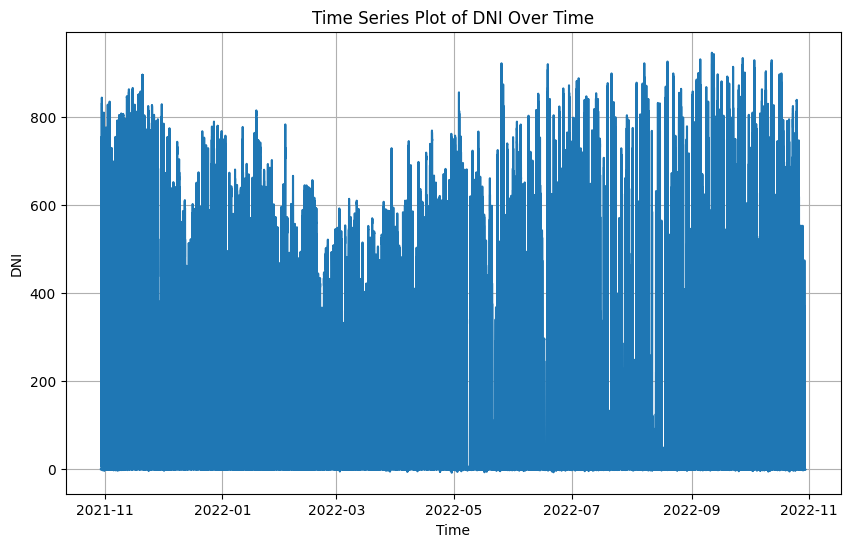

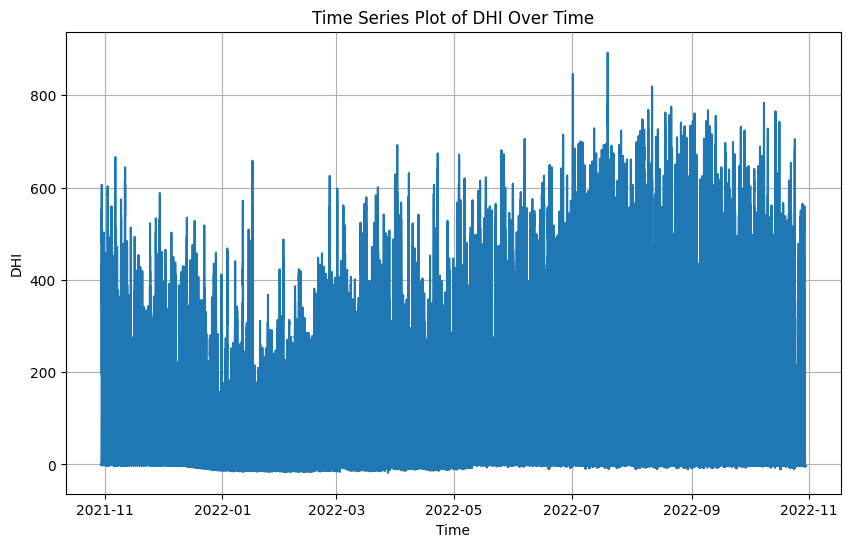

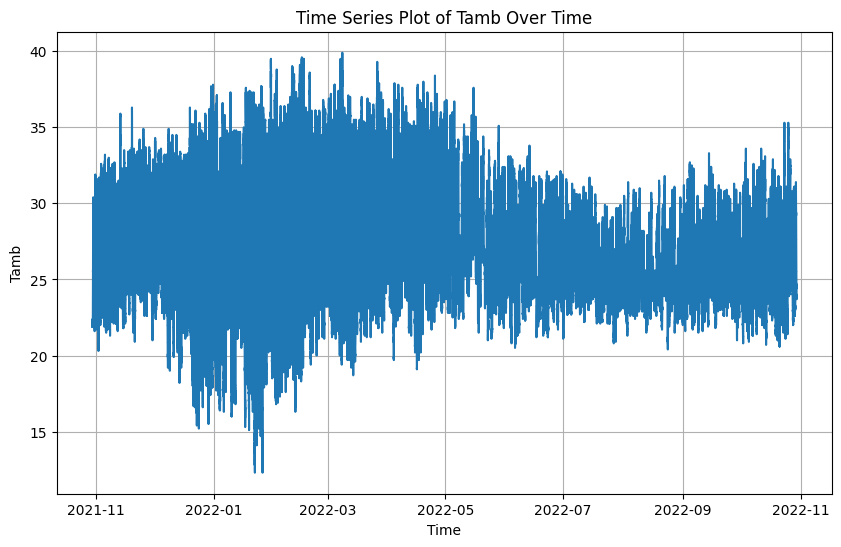

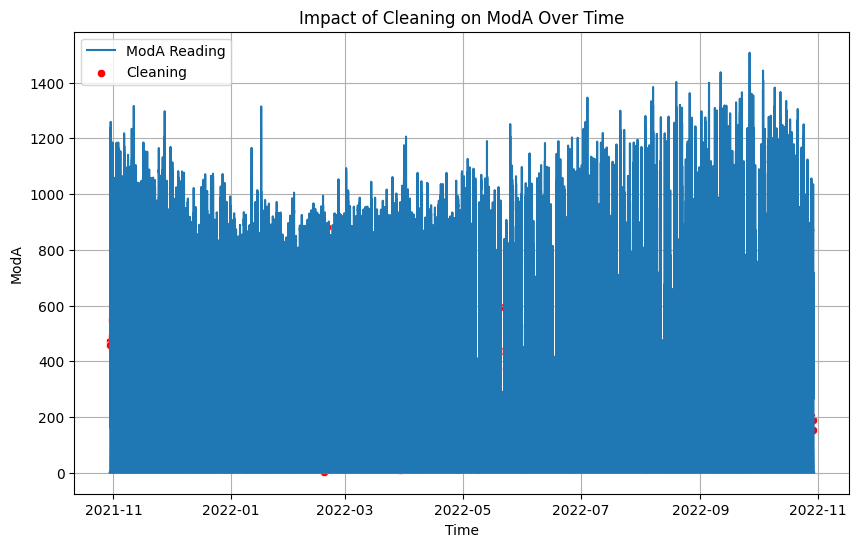

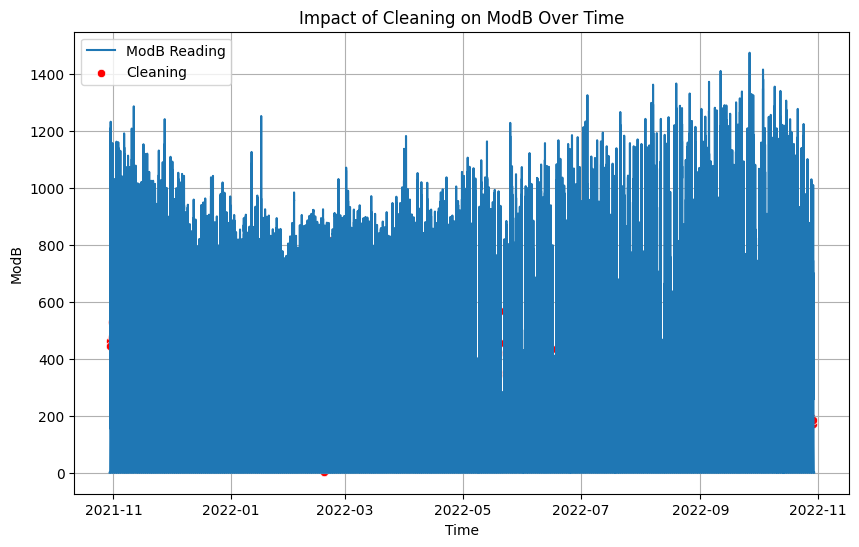

In [3]:
""" Time Series Analysis """

# Plot GHI, DNI, DHI, and Tamb over time for sierraleone dataset
plot_time_series(sierraleone_df, ['GHI', 'DNI', 'DHI', 'Tamb'], date_column='Timestamp')

# Evaluate the impact of cleaning on ModA and ModB for sierraleone dataset
evaluate_cleaning_impact(sierraleone_df, ['ModA', 'ModB'], cleaning_column='Cleaning', date_column='Timestamp')

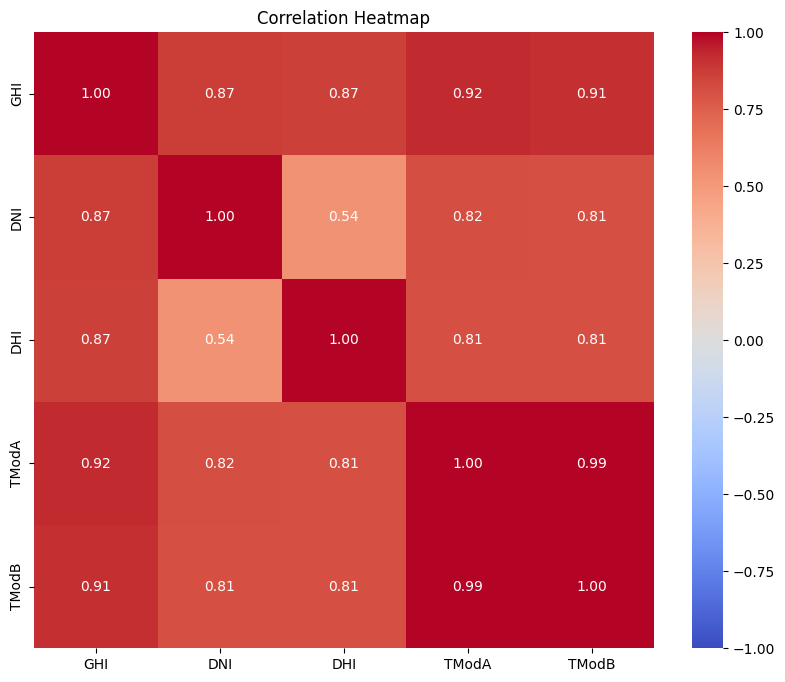

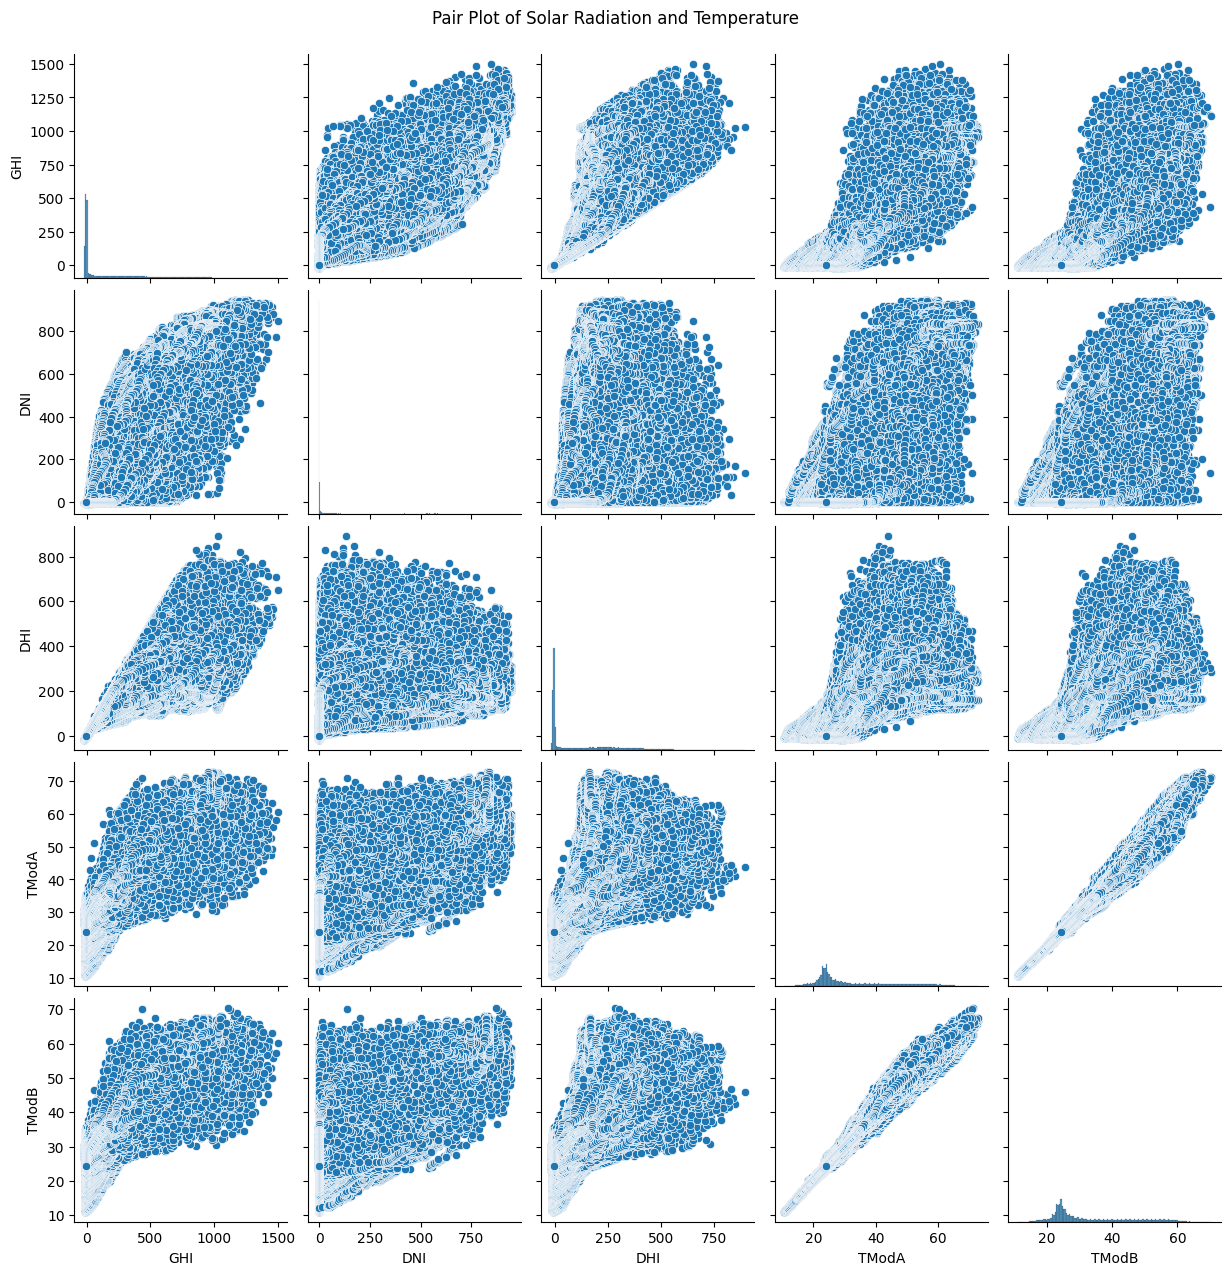

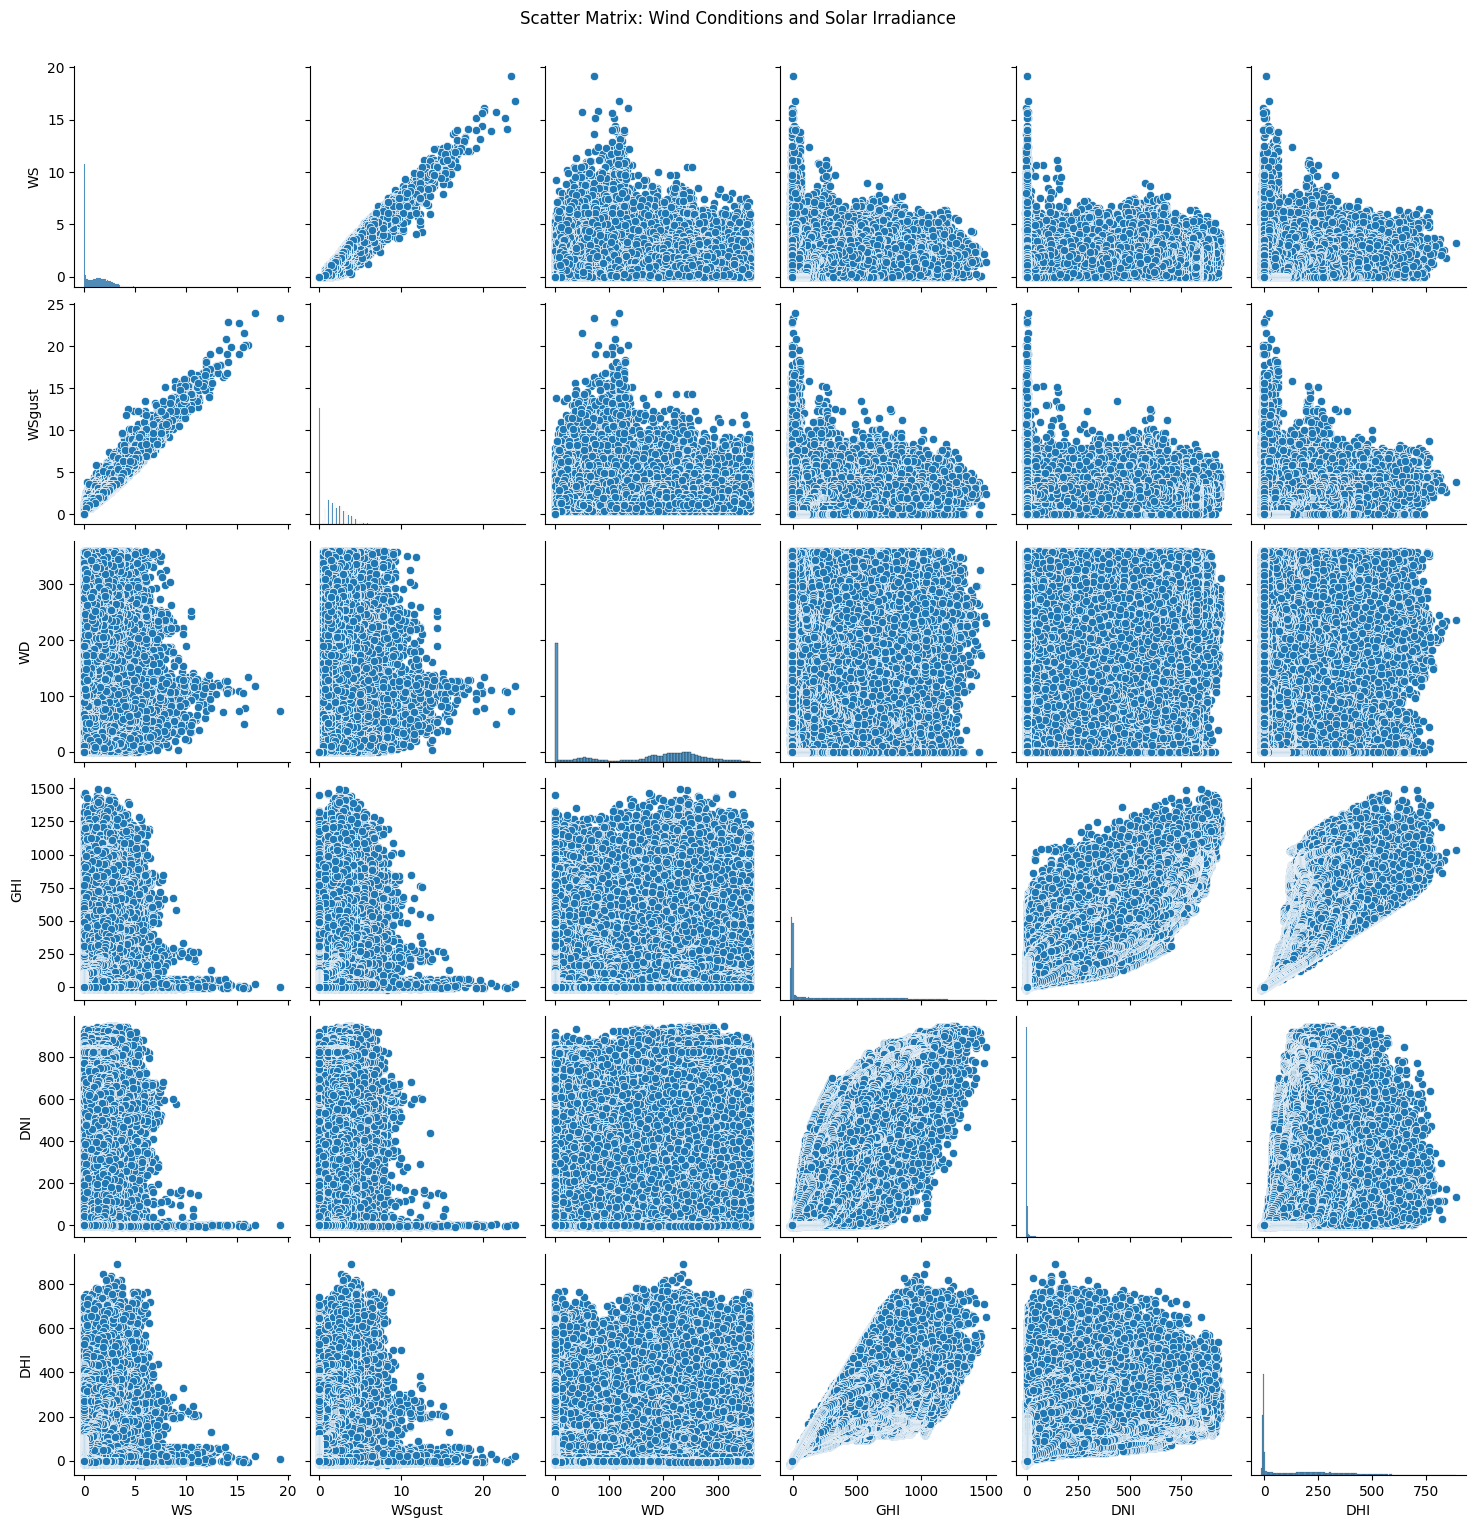

In [4]:
""" Correlation Analysis """

# Define the columns to include in the heatmap
columns_to_include = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plot_correlation_heatmap(sierraleone_df, columns_to_include)

# Use the same columns for the pair plot
plot_pairplot(sierraleone_df, columns_to_include)

# Define the wind-related columns
wind_columns = ['WS', 'WSgust', 'WD']
# Combine with irradiance columns for the scatter matrix
plot_wind_scatter_matrix(sierraleone_df, wind_columns, ['GHI', 'DNI', 'DHI'])

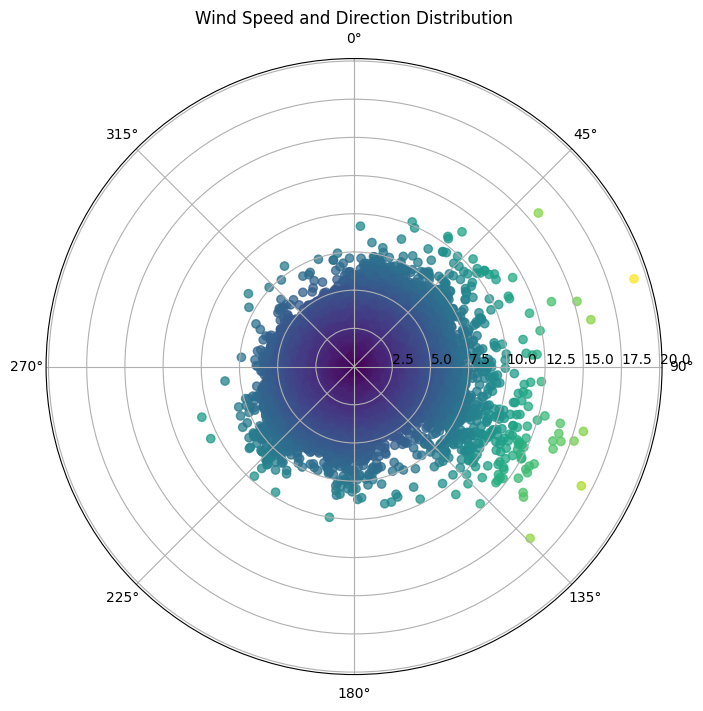

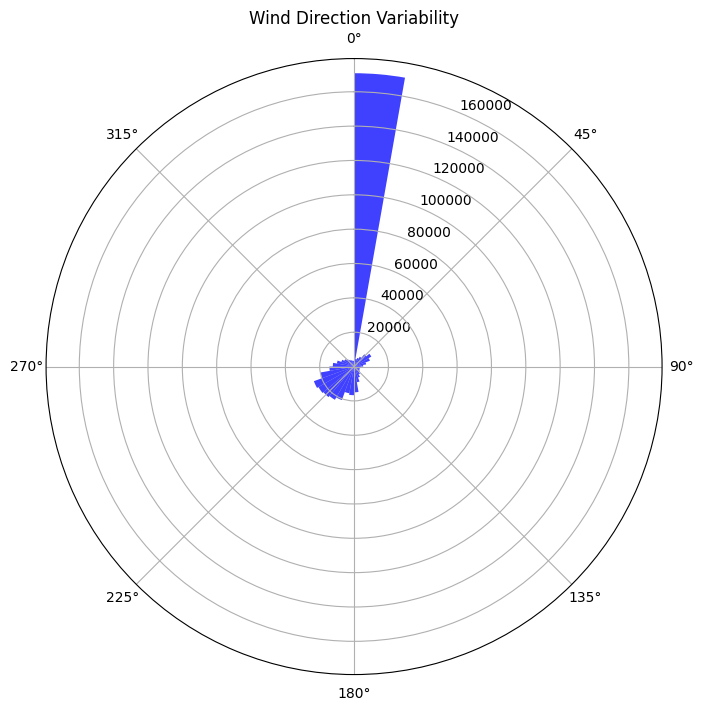

In [5]:
""" Wind Analysis """

# Call the function with your dataset
plot_wind_polar(sierraleone_df, 'WS', 'WD')


# Call the function with your dataset
plot_wind_direction_variability(sierraleone_df, 'WD')

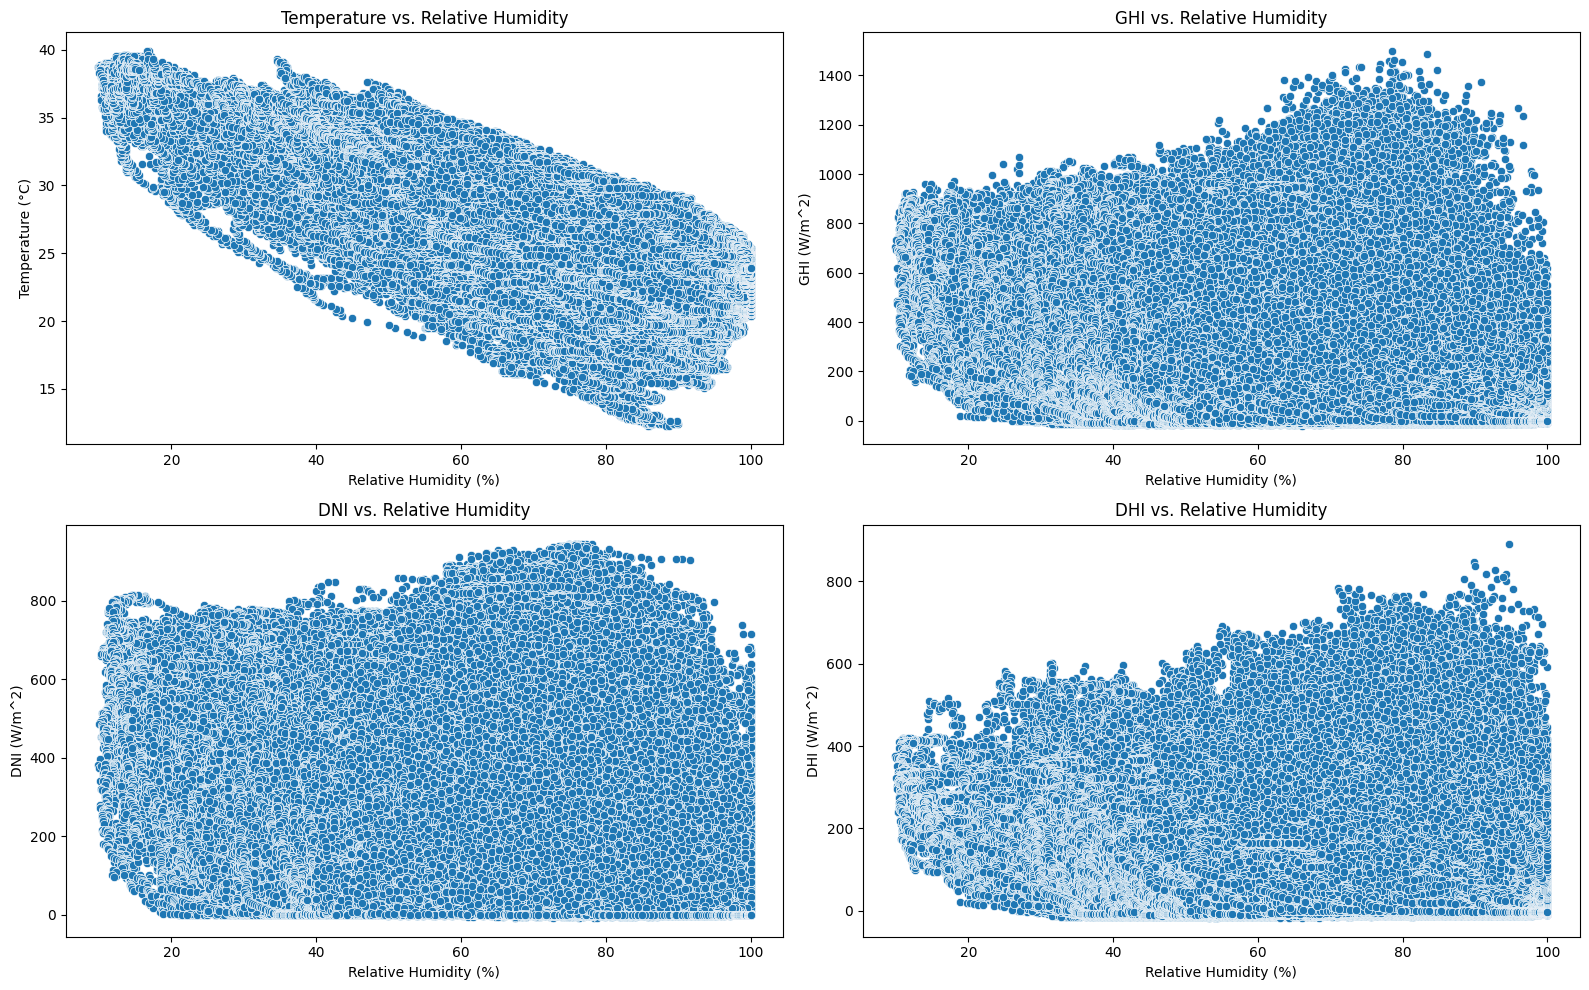

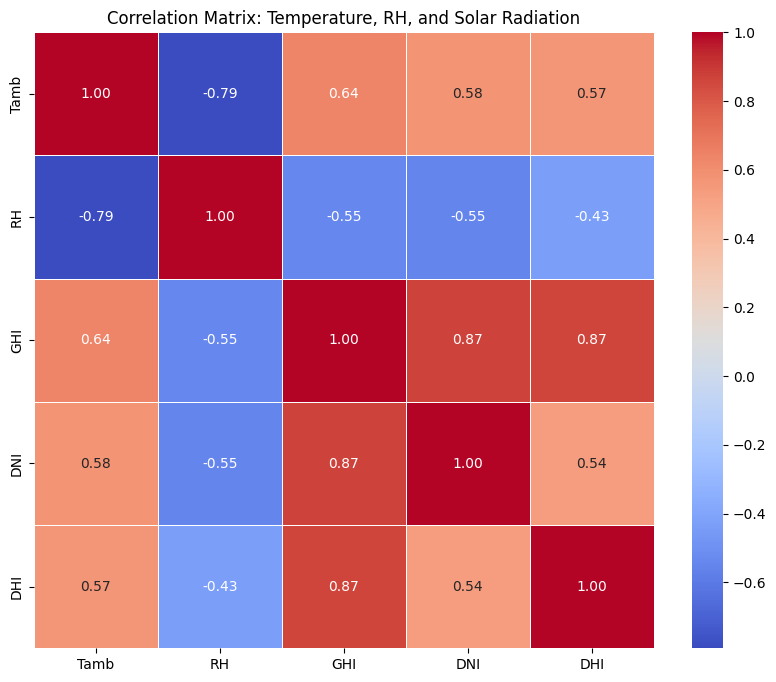

In [6]:
"""Temperature Analysis"""

# Scatter plot to visualize relationship
plot_temperature_vs_rh(sierraleone_df, 'Tamb', 'RH', 'GHI', 'DNI', 'DHI')

# Correlation Analysis
correlation_analysis(sierraleone_df, ['Tamb', 'RH', 'GHI', 'DNI', 'DHI'])


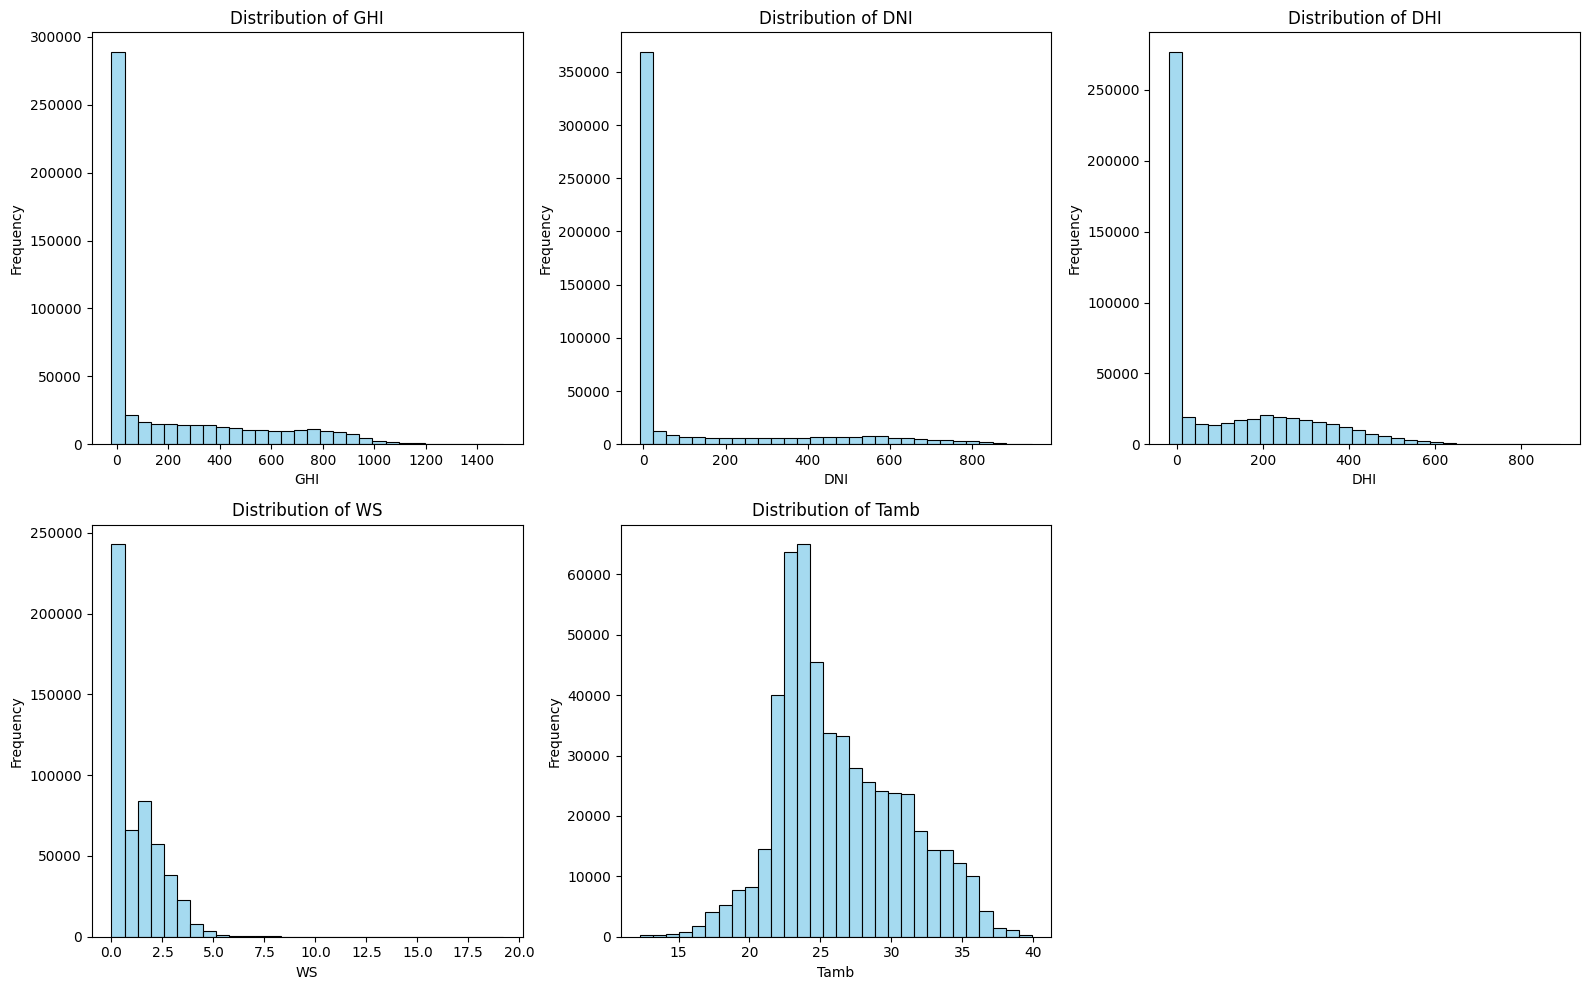

In [7]:
""" Histogram """

# List of variables to plot histograms for
columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Plot histograms for the sierraleone dataset
plot_histograms(sierraleone_df, columns)

In [8]:
""" Z-Score Analysis """

# List of variables to perform Z-score analysis on
columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS']

# Calculate Z-scores and flag outliers for the sierraleone dataset
sierraleone_z_scores = calculate_z_scores(sierraleone_df, columns)

# Display the flagged outliers
outliers = sierraleone_df[sierraleone_z_scores.filter(like='_outlier').any(axis=1)]
print("Outliers in the sierraleone dataset:")
print(outliers)

""" Z-Scores: Each variable (e.g., GHI, DNI) will have a corresponding Z-score column (e.g., GHI_z_score). The Z-score represents the number of standard deviations a data point is from the mean.

Outliers: The function will create a boolean column (e.g., GHI_outlier) for each variable, where True indicates that the data point is an outlier (i.e., its absolute Z-score is greater than the threshold).  """


Outliers in the sierraleone dataset:
                 Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH  \
653    2021-10-30 10:54:00  814.0  257.0  594.3  878.0  856.0  25.9  85.3   
654    2021-10-30 10:55:00  826.0  263.5  599.6  883.0  861.0  26.0  85.4   
655    2021-10-30 10:56:00  851.0  285.0  605.9  912.0  890.0  26.0  84.2   
656    2021-10-30 10:57:00  823.0  254.8  603.9  878.0  856.0  26.0  85.3   
657    2021-10-30 10:58:00  810.0  244.5  598.8  864.0  843.0  26.1  85.7   
...                    ...    ...    ...    ...    ...    ...   ...   ...   
522184 2022-10-27 15:05:00  167.2   -0.5  165.1  167.6  160.9  30.4  68.3   
522185 2022-10-27 15:06:00  163.4   -0.6  161.0  165.7  159.2  30.2  67.7   
522194 2022-10-27 15:15:00  183.5    0.3  181.6  173.7  168.7  29.3  70.2   
523792 2022-10-28 17:53:00   31.3   -0.5   30.2   34.3   32.3  28.4  79.5   
523794 2022-10-28 17:55:00   22.8   -0.8   21.4   26.5   25.0  27.9  80.4   

         WS  WSgust  WSstdev     WD  W

' Z-Scores: Each variable (e.g., GHI, DNI) will have a corresponding Z-score column (e.g., GHI_z_score). The Z-score represents the number of standard deviations a data point is from the mean.\n\nOutliers: The function will create a boolean column (e.g., GHI_outlier) for each variable, where True indicates that the data point is an outlier (i.e., its absolute Z-score is greater than the threshold).  '

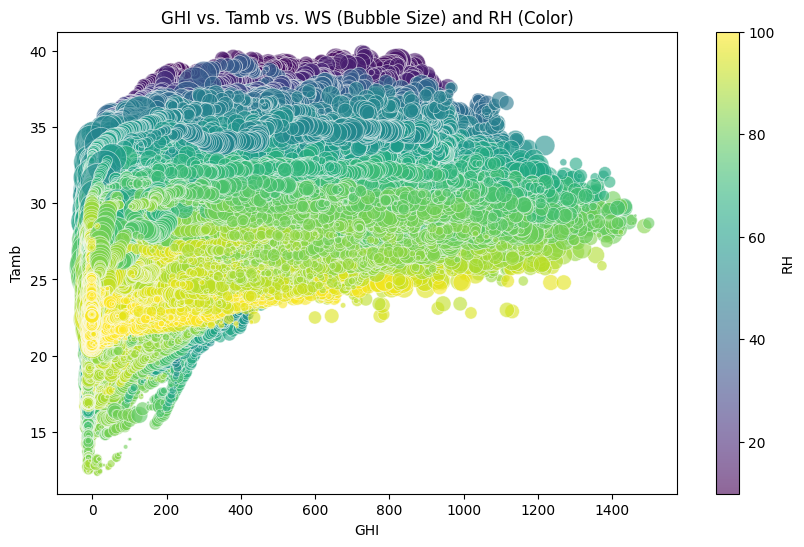

In [9]:
""" Bubble charts """

# Bubble chart of GHI vs. Tamb vs. WS, with bubble size representing RH (Relative Humidity)
plot_bubble_chart(
    df=sierraleone_df, 
    x_column='GHI', 
    y_column='Tamb', 
    size_column='WS', 
    color_column='RH', 
    title='GHI vs. Tamb vs. WS (Bubble Size) and RH (Color)'
)


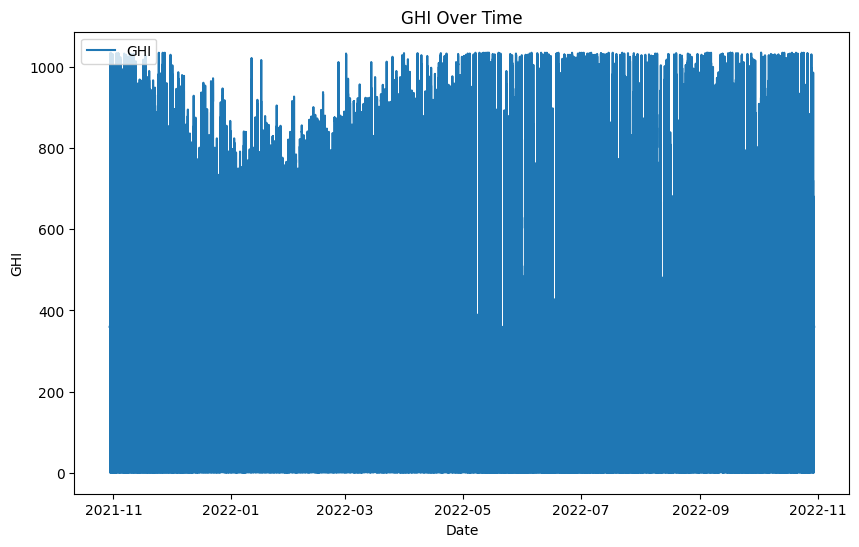

Timestamp    GHI    DNI    DHI  ModA  ModB  Tamb    RH   WS  \
0 2021-10-30 00:01:00  359.5  115.3  225.0   0.0   0.0  21.9  99.1  0.0   
1 2021-10-30 00:02:00  359.5  115.3  225.0   0.0   0.0  21.9  99.2  0.0   
2 2021-10-30 00:03:00  359.5  115.3  225.0   0.0   0.0  21.9  99.2  0.0   
3 2021-10-30 00:04:00  359.5    0.0  225.0   0.0   0.0  21.9  99.3  0.0   
4 2021-10-30 00:05:00  359.5  115.3  225.0   0.0   0.0  21.9  99.3  0.0   

   WSgust  WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0     0.0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1     0.0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2     0.0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3     0.0      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4     0.0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [10]:
""" Data Cleaning """

# Handle missing values
sierraleone_df_cleaned= handle_missing_values(sierraleone_df)

# Handle anomalies (e.g., negative values)
sierraleone_df_cleaned = handle_anomalies(sierraleone_df, columns=['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS', 'WSgust'])

# Handle outliers
sierraleone_df_cleaned = handle_outliers(sierraleone_df, columns=['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS', 'WSgust'])

import matplotlib.pyplot as plt

# Example: Plotting GHI vs. Time
plt.figure(figsize=(10, 6))
plt.plot(sierraleone_df_cleaned['Timestamp'], sierraleone_df_cleaned['GHI'], label='GHI')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.title('GHI Over Time')
plt.legend()
plt.show()

# Display the first few rows of the cleaned DataFrame
sierraleone_df_cleaned.head()